In [17]:
import numpy as np
import math
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split


from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
import keras

batch_size=50
epochs=150
lr=0.001

standard report for any report

- general introduction
no real separation between different tasks
- methodologies
fina if over all section or split into different tasks
- results and discussion
show results for all the methods we tried
report the results we got in the test set and discuss
- conclusion
what did we learn, the insights
what we could have done better


10 pages, no cover, no index, no apendix, single column

(964908,) 964908 42.0
(964908, 49)
(345744, 49)
(547, 2304) 2304 48.0
(547, 2304)
(196, 2304)


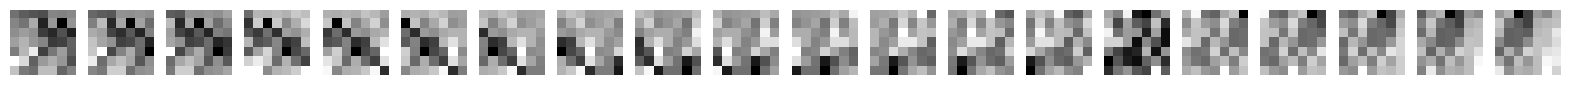

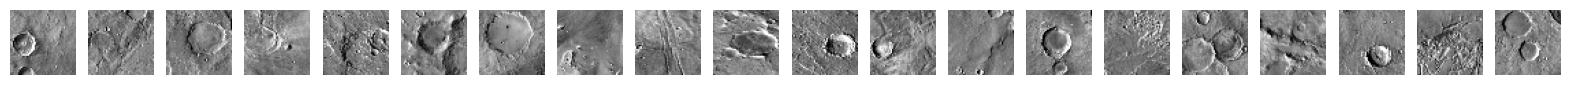

In [18]:
Xtrain2_a = np.load('Xtrain2_a.npy')/255
Ytrain2_a = np.load('Ytrain2_a.npy')/255
print(Ytrain2_a.shape, Ytrain2_a.shape[0], math.sqrt(Ytrain2_a.shape[0] / 547))
print(Xtrain2_a.shape)

Xtest2_a = np.load('Xtest2_a.npy')/255
print(Xtest2_a.shape)


Xtrain2_b = np.load('Xtrain2_b.npy')/255
Ytrain2_b = np.load('Ytrain2_b.npy')/255
print(Ytrain2_b.shape, Ytrain2_b.shape[1], math.sqrt(Ytrain2_b.shape[1]))
print(Xtrain2_b.shape)

Xtest2_b = np.load('Xtest2_b.npy')/255
print(Xtest2_b.shape)


# show the 10 fist images from each X
import matplotlib.pyplot as plt
n = 20
fig, axs = plt.subplots(1, n, figsize=(20, 3))
for i in range(n):
    axs[i].imshow(Xtrain2_a[i].reshape((7, 7)), cmap='gray')
    axs[i].axis('off')
plt.show()


n = 20
fig, axs = plt.subplots(1, n, figsize=(20, 3))
for i in range(n):
    axs[i].imshow(Xtrain2_b[i].reshape((48, 48)), cmap='gray')
    axs[i].axis('off')
plt.show()



In [19]:
# apply a logistic regressor to the a dataset
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(Xtrain2_b, Ytrain2_b, test_size=0.2, random_state=0)

In [20]:
# clf = LogisticRegression(random_state=0, max_iter=1000)
# scores = cross_val_score(clf, X_train, Y_train, cv=5)
# print(scores)
# print(np.mean(scores))

# clf.fit(X_train, Y_train)
# print(clf.score(X_test, Y_test))

In [21]:
print(X_train.shape, Y_train.shape)
print(X_train[0].shape, Y_train[0].shape)


(437, 2304) (437, 2304)
(2304,) (2304,)


In [22]:
model_MLP = Sequential()

model_MLP.add(Dense(32,activation = 'relu',input_dim = 2304))
# model_MLP.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
model_MLP.add(Dense(64,activation = 'relu'))
model_MLP.add(Dense(64,activation = 'relu'))
model_MLP.add(Dense(64,activation = 'relu'))
model_MLP.add(Dense(64,activation = 'relu'))
model_MLP.add(Dense(2304,activation = 'softmax'))

model_MLP.summary()

c:\Users\j040c\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │        73,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2304)           │       149,760 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 238,112 (930.12 KB)

 Trainable params: 238,112 (930.12 KB)

 Non-trainable params: 0 (0.00 B)

In [106]:
# adam = keras.optimizers.Adam(learning_rate = lr)
# model_MLP.compile(optimizer = adam,
#               loss = 'categorical_crossentropy',
#               metrics=['accuracy'])

model_MLP = build_cnn_model(input_shape)

#MLP without early stopping X_train, X_test, Y_train, Y_test
history = model_MLP.fit(x = X_train.reshape((437,48,48)), y = Y_train.reshape((437,48,48)), epochs = epochs, batch_size = batch_size, validation_data = (X_test.reshape((110,48,48)),Y_test.reshape((110,48,48))),verbose = 1)
# history = model_MLP.fit(x = X_train.reshape((437,2304)), y = Y_train.reshape((437,2304)), epochs = epochs, batch_size = batch_size, validation_data = (X_test.reshape((110,2304)),Y_test.reshape((110,2304))),verbose = 1)


####PLOT EVOLUTION
plt.figure(1)
plt.clf()
plt.plot(history.history['loss'], label='train'),
plt.plot(history.history['val_loss'], label='train'), plt.show()

Epoch 1/150


ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None, 48, 48), output.shape=(None, 1)

c:\Users\j040c\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       819,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 2304)           │       297,216 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,135,360 (4.33 MB)

 Trainable params: 1,135,360 (4.33 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 149ms/step - accuracy: 0.0000e+00 - loss: 0.6928 - val_accuracy: 0.0000e+00 - val_loss: 0.6910
Epoch 2/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.0000e+00 - loss: 0.6902 - val_accuracy: 0.0000e+00 - val_loss: 0.6851
Epoch 3/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.0000e+00 - loss: 0.6838 - val_accuracy: 0.0000e+00 - val_loss: 0.6714
Epoch 4/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.0000e+00 - loss: 0.6711 - val_accuracy: 0.0000e+00 - val_loss: 0.6473
Epoch 5/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.0000e+00 - loss: 0.6528 - val_accuracy: 0.0000e+00 - val_loss: 0.6199
Epoch 6/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.0000e+00 - loss: 0.6376 - val_accuracy: 0.0000e+00 - val_loss: 0.6026
Epoch 7/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.0000e+00 - loss: 0.6227 - val_accuracy: 0.0000e+00 - val_loss: 0.5928
Epoch 8/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy:

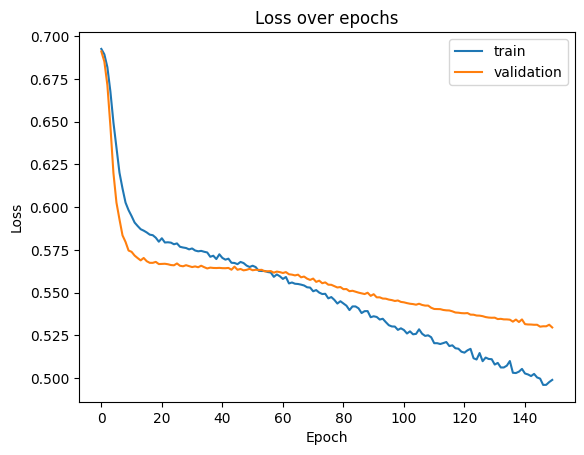

In [23]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
import matplotlib.pyplot as plt

# Define a CNN model
def build_cnn_model(input_shape=(48, 48, 1)):
    model = Sequential()

    # 1st Conv Layer
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # 2nd Conv Layer
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten the layers
    model.add(Flatten())

    # Fully connected layers
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))  # Regularization
    model.add(Dense(2304, activation='sigmoid'))  # Output layer for binary segmentation
    
    
    
    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='binary_crossentropy',  # For crater vs. non-crater pixel classification
                  metrics=['accuracy'])

    return model

# Initialize the model
input_shape = (48, 48, 1)  # Adjust input shape according to your image data
model_CNN = build_cnn_model(input_shape)

# Check model summary
model_CNN.summary()

# Reshaping input data (X_train) and labels (Y_train) for pixel-wise segmentation
X_train = X_train.reshape(-1, 48, 48, 1)
X_test = X_test.reshape(-1, 48, 48, 1)

# Reshape Y_train and Y_test to match the shape of the input images (binary masks)
Y_train = Y_train.reshape(-1, 48, 48, 1)
Y_test = Y_test.reshape(-1, 48, 48, 1)

# Train the CNN model with the corrected Y shapes
history = model_CNN.fit(X_train, Y_train.reshape(437, 2304), 
                        epochs=150,
                        batch_size=50,
                        validation_data=(X_test, Y_test.reshape(110, 2304)), 
                        verbose=1)


# Plot the loss curve
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Loss over epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()
